In [25]:
%load_ext autoreload
%autoreload 2

# Zgoubidoo tutorial

A gentle introduction to Zgoubidoo: a modern Python 3 interface to the Zgoubi ray-tracing code.

Tutorial's objectives:
- Build Zgoubi simulations from scratch with no advanced knowledge of Zgoubi or Python
- Introduce key concepts usefull for a wide range of Zgoubi simulations
- Highlights advantages of Zgoubidoo: ease of use, repeatability, speed (especially on multi-core computers, aka. any computers)

## Getting started

Assume you have the `zgoubi` executable located somewhere in your path.

### Import zgoubidoo

In [1]:
import zgoubidoo
from zgoubidoo.commands import *

All physical quantities used by `zgoubidoo` have units. For simplicity the 'units registry' can get a short name:

In [2]:
from zgoubidoo import ureg as _

Let's have a first look at units:

In [3]:
a = 1 * _.m
b = 1 * _.m + 10 * _.cm
b += a
b.to('hectometers').magnitude

0.021

A bit more interesting:

In [4]:
brho = 1 * _.tesla * 10 * _.cm
brho.to('kilogauss meter')

<Quantity(1.0, 'kilogauss * meter')>

**Exercice**: define quantities in other units of interest for Zgoubi simulations. In particular, try angles, energies, etc.

### Import additionnal very useful Python packages

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Exercice**: Have a look at what `matplotlib`, `numpy` and `pandas` are and what they can do.

### A first look at Zgoubi keywords and Zgoubidoo commands

All `zgoubi` commands ('KEYWORDS') have their equivalent `zgoubidoo` class. They all inhereit from the `zgoubidoo.commands.Command` base class which overloads a bunch of "special" Python functions. Most notably the `__str__` function.

In [17]:
Quadrupole

zgoubidoo.commands.magnetique.Quadrupole

In [18]:
Venus

zgoubidoo.commands.magnetique.Venus

In [19]:
ChangRef

zgoubidoo.commands.commands.ChangRef

In [20]:
Fit

zgoubidoo.commands.commands.Fit

In [22]:
Particule

zgoubidoo.commands.particules.Particule

In [23]:
Tosca

zgoubidoo.commands.fieldmaps.Tosca

**Exercice**: Find your favorite command. Complain if it's not available. (*bonus*) Implement a new command, just to see how easy it is.

And so on.

To create a command one needs to instanciate an object from the corresponding class:

In [24]:
Quadrupole()


        
        'QUADRUPO' dd6437e35f
        2
        0.000000000000e+00 1.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        0.1
        1 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        

All commands have sensible (at least I'm aiming for that) default values. This means that it is possible to create a working command without changing anything.

Note that the *LABEL1* attribute gets an automatically created random value. This is useful, see later.

Of course the next step is to look at the parameters of the command. The `PARAMETERS` attribute of each class provides the full list of available parameters, along with their default values and a documentation string.

In [32]:
Particule.PARAMETERS

{'LABEL1': ('',
  'Primary label for the Zgoubi command (default: auto-generated hash).'),
 'LABEL2': ('', 'Secondary label for the Zgoubi command.'),
 'M': (<Quantity(0, 'megaelectronvolt_per_c2')>, 'Mass of the particle.'),
 'Q': (<Quantity(0, 'coulomb')>, 'Charge of the particle.'),
 'G': (0, 'Factor'),
 'tau': (0, 'Lifetime of the particle.')}

When the command is created those parameters are instanciated as `attributes`:

In [33]:
Quadrupole().attributes

{'LABEL1': 'f7c04d1f6d',
 'LABEL2': '',
 'HEIGHT': <Quantity(20, 'centimeter')>,
 'REFERENCE_FIELD_COMPONENT': 'BZ',
 'KINEMATICS': None,
 'WIDTH': <Quantity(50, 'centimeter')>,
 'APERTURE_LEFT': <Quantity(10, 'centimeter')>,
 'APERTURE_RIGHT': <Quantity(10, 'centimeter')>,
 'APERTURE_TOP': <Quantity(10, 'centimeter')>,
 'APERTURE_BOTTOM': <Quantity(10, 'centimeter')>,
 'COLOR': 'blue',
 'IL': 2,
 'XL': <Quantity(0, 'centimeter')>,
 'R0': <Quantity(1.0, 'centimeter')>,
 'B0': <Quantity(0, 'kilogauss')>,
 'XE': <Quantity(2.0, 'centimeter')>,
 'LAM_E': <Quantity(0, 'centimeter')>,
 'C0_E': 0,
 'C1_E': 1,
 'C2_E': 0,
 'C3_E': 0,
 'C4_E': 0,
 'C5_E': 0,
 'XS': <Quantity(2.0, 'centimeter')>,
 'LAM_S': <Quantity(0, 'centimeter')>,
 'C0_S': 0,
 'C1_S': 1,
 'C2_S': 0,
 'C3_S': 0,
 'C4_S': 0,
 'C5_S': 0,
 'XPAS': <Quantity(0.1, 'centimeter')>,
 'KPOS': 1,
 'XCE': <Quantity(0, 'centimeter')>,
 'YCE': <Quantity(0, 'centimeter')>,
 'ALE': <Quantity(0, 'radian')>}

Some have default values:

In [34]:
Quadrupole().defaults

{'LABEL2': '',
 'HEIGHT': <Quantity(20, 'centimeter')>,
 'REFERENCE_FIELD_COMPONENT': 'BZ',
 'KINEMATICS': None,
 'WIDTH': <Quantity(50, 'centimeter')>,
 'APERTURE_LEFT': <Quantity(10, 'centimeter')>,
 'APERTURE_RIGHT': <Quantity(10, 'centimeter')>,
 'APERTURE_TOP': <Quantity(10, 'centimeter')>,
 'APERTURE_BOTTOM': <Quantity(10, 'centimeter')>,
 'COLOR': 'blue',
 'IL': 2,
 'XL': <Quantity(0, 'centimeter')>,
 'R0': <Quantity(1.0, 'centimeter')>,
 'B0': <Quantity(0, 'kilogauss')>,
 'LAM_E': <Quantity(0, 'centimeter')>,
 'C0_E': 0,
 'C1_E': 1,
 'C2_E': 0,
 'C3_E': 0,
 'C4_E': 0,
 'C5_E': 0,
 'LAM_S': <Quantity(0, 'centimeter')>,
 'C0_S': 0,
 'C1_S': 1,
 'C2_S': 0,
 'C3_S': 0,
 'C4_S': 0,
 'C5_S': 0,
 'XPAS': <Quantity(0.1, 'centimeter')>,
 'KPOS': 1,
 'XCE': <Quantity(0, 'centimeter')>,
 'YCE': <Quantity(0, 'centimeter')>,
 'ALE': <Quantity(0, 'radian')>}

Others have non-default values:

In [35]:
Quadrupole().nondefaults

{'LABEL1': 'cdbb9a1b5c',
 'XE': <Quantity(2.0, 'centimeter')>,
 'XS': <Quantity(2.0, 'centimeter')>}

Note that the initializer of `Quadrupole` is taking the initiative of setting `XE` and `XS` to twice the bore radius.

Specific values for the attributes can be defined at the creation of the object:

In [38]:
Quadrupole('COOL_QUAD', XL=2*_.meter, XPAS=3*_.cm)


        
        'QUADRUPO' COOL_QUAD
        2
        2.000000000000e+02 1.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        3.0
        1 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        

Of course it is possible to change and access the attributes values at any time:

In [44]:
my_quad = Quadrupole('COOL_QUAD', XL=2*_.m, XPAS=3*_.centimeter)
my_quad.KPOS = 2
my_quad.B0 = 2 * _.tesla
print(f"The field at the pole tips is now {my_quad.B0}.")
my_quad

The field at the pole tips is now 2 tesla



        
        'QUADRUPO' COOL_QUAD
        2
        2.000000000000e+02 1.000000000000e+00 2.000000000000e+01
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        3.0
        2 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        

And look again at the nondefault attributes:

In [45]:
my_quad.nondefaults

{'LABEL1': 'COOL_QUAD',
 'XL': <Quantity(2, 'meter')>,
 'B0': <Quantity(2, 'tesla')>,
 'XE': <Quantity(2.0, 'centimeter')>,
 'XS': <Quantity(2.0, 'centimeter')>,
 'XPAS': <Quantity(3, 'centimeter')>,
 'KPOS': 2}

**Exercice**: define other objects, explore the different Zgoubi keywords, change the attributes, etc. In particular: create a custom BEND, a custome DRIFT.

### Creating a first Zgoubi input file

To create a zgoubi input file `zgoubidoo` provides a dedicated class: `zgoubidoo.Input`. An input can have a name and will hold a list of `zgoubidoo.commands` objects.

The `zgoubidoo.Input` objects also override the `__str__` method, which allows to automatically print them or save them to files.

In [46]:
zgoubidoo.Input()

beamline
        'END' 765efdab8b 
        

To make life easier, `zgoubidoo` will automatically add a `End` command at the end of each input.

Let's get started and create a FODO sequence.

In [3]:
qf = Quadrupole('QF', XL=1*_.m, B0=1 * _.tesla)
qd = Quadrupole('QD', XL=1*_.m, B0=-1 * _.tesla)

zi = zgoubidoo.Input(name='FODO', line=[
    qf,
    Drift(XL=1 * _.m),
    qd,
    Drift(XL=1 * _.m),
])  # zi stands for `zgoubi input`
zi

FODO
        
        'QUADRUPO' QF
        2
        1.000000000000e+02 1.000000000000e+00 1.000000000000e+01
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        0.1
        1 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        
        
        'DRIFT' c2d697766c
        1.000000000000e+02
        
        
        'QUADRUPO' QD
        2
        1.000000000000e+02 1.000000000000e+00 -1.000000000000e+01
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00

We are close to being able to run this with Zgoubi. But one more thing: let's define the particle type and add a beam (*ie.* a `zgoubi` objet).

Zgoubidoo defines classes for a relatively large set of common particles:

In [59]:
import inspect
inspect.getmembers(zgoubidoo.commands.particules, inspect.isclass)

[('AntiMuon', zgoubidoo.commands.particules.AntiMuon),
 ('AntiProton', zgoubidoo.commands.particules.AntiProton),
 ('CarbonIon', zgoubidoo.commands.particules.CarbonIon),
 ('Electron', zgoubidoo.commands.particules.Electron),
 ('HMinus', zgoubidoo.commands.particules.HMinus),
 ('HeliumIon', zgoubidoo.commands.particules.HeliumIon),
 ('ImmortalAntiMuon', zgoubidoo.commands.particules.ImmortalAntiMuon),
 ('ImmortalMuon', zgoubidoo.commands.particules.ImmortalMuon),
 ('Ion', zgoubidoo.commands.particules.Ion),
 ('LeadIon', zgoubidoo.commands.particules.LeadIon),
 ('Muon', zgoubidoo.commands.particules.Muon),
 ('OxygenIon', zgoubidoo.commands.particules.OxygenIon),
 ('Particule', zgoubidoo.commands.particules.Particule),
 ('ParticuleType', zgoubidoo.commands.particules.ParticuleType),
 ('Pion', zgoubidoo.commands.particules.Pion),
 ('Positron', zgoubidoo.commands.particules.Positron),
 ('Proton', zgoubidoo.commands.particules.Proton),
 ('SulfurIon', zgoubidoo.commands.particules.SulfurIon)

Let's use a proton:

In [61]:
Proton()


        'PARTICUL' PROTON
        9.382720300000e+02 1.602176487000e-19 1.792847350500e+00 0.000000000000e+00 0.0
        

We will also need to define the energy, momentum, etc. of the particles. To that end, `zgoubidoo` provides a very easy to use `Kinematics` class:

In [5]:
k = zgoubidoo.Kinematics(2 * _.GeV)
k


        Proton
        Total energy: 1999.9999999999998 megaelectronvolt
        Kinetic energy: 1061.7279699999997 megaelectronvolt
        Momentum: 1.7662518500258333 gigaelectronvolt / speed_of_light
        Magnetic rigidity: 5.891582002459293 meter * tesla
        Range in water (protons only): 407.2585159114895 centimeter
        Relativistic beta: 0.8831259250129166
        Relativistic gamma: 2.1315779817075007
        

The constructor will infer the quantity based on the units, and provide a bunch of conversions if needed:

In [66]:
k.brho.to('kilogauss meter')

<Quantity(11.53792360043043, 'kilogauss * meter')>

Next step is to define a `zgoubi` *Objet*. We can either directly use the objet classes or use an abstraction provided by `zgoubidoo`: `Beam`.
    
Let's start with `Objet2`.

In [69]:
Objet2('BUNCH', BORO=k.brho)


        'OBJET' BUNCH
        1.153792360043e+03
        2.00
        1 1
        0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 A
        1

We are all set, let's redfine the `zgoubi.Input`:

In [28]:
qf = Quadrupole('QF', XL=1*_.m, B0=1 * _.tesla)
qd = Quadrupole('QD', XL=1*_.m, B0=-1 * _.tesla)

zi = zgoubidoo.Input(name='FODO', line=[
    Objet2('BUNCH', BORO=k.brho),
    Proton(),
    qf,
    Drift(XL=1 * _.m),
    qd,
    Drift(XL=1 * _.m),
])  # zi stands for `zgoubi input`
zi

FODO
        'OBJET' BUNCH
        5.891582002459e+03
        2.00
        1 1
        0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 A
        1

        'PARTICUL' PROTON
        9.382720300000e+02 1.602176487000e-19 1.792847350500e+00 0.000000000000e+00 0.0
        
        
        'QUADRUPO' QF
        2
        1.000000000000e+02 1.000000000000e+00 1.000000000000e+01
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        0.1
        1 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        
        
        'DRIFT' 224f53c357
        1.000000000000e+02
        
        
        'QUADRUPO' QD
        2
        1.000000

At this point you should be really impatient to run this with Zgoubi...

As you guessed `zgoubidoo` provides a class `Zgoubi` which is an abstraction to the `zgoubi` executable:

In [7]:
z = zgoubidoo.Zgoubi()
z

It doesn't do much, but when you **call** it `zgoubi` will be run:

In [8]:
z(zi)

Looked like nothing happened... but `zgoubi` has been executed.

Now a little detour: `zgoubidoo` works beautifully with multi-threading, all in a transparent way. This means that you can launch multiple instances of `zgoubi` at the same time, even in an interactive session like this one, without blocking.

The drawback is that you need to collect the results:

In [9]:
z.cleanup()
zr = z(zi).collect()  # zr stands for 'zgoubi results'
zr

Once more, all the resutls are encapsulated in a `ZgoubiResults` class.

It has many functionalities:

In [10]:
zr.print()

Results for mapping {}

FODO
 'OBJET' BUNCH                                                                                                1
5.891582002459e+03
2.00
1 1
0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 A
1
 
 'PARTICUL' PROTON                                                                                            2
9.382720300000e+02 1.602176487000e-19 1.792847350500e+00 0.000000000000e+00 0.0
 
 
 'QUADRUPO' QF                                                                                                3
2
1.000000000000e+02 1.000000000000e+00 1.000000000000e+01
2.000000000000e+00 0.000000000000e+00
6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
2.000000000000e+00 0.000000000000e+00
6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
0.1
1 0.000000000000e+00 0.000000000

The default behavior of `ZgoubiResults.print()` is to show the `zgoubi.res` file.

It is possible to look at other results.

In [11]:
zr.print('stdout')

Results for mapping {}


  Zgoubi, author's dvlpmnt version.
  Job  started  on  17-06-2019,  at  23:52:45 
   Copying  zgoubi.dat  into  zgoubi.res,
   numbering  and  labeling  elements...

 Title : FODO                                                                            


    1/    7 OBJET     /BUNCH               /                                    
    2/    7 PARTICUL  /PROTON              /                                    
    3/    7 QUADRUPO  /QF                  /                                    
    4/    7 DRIFT     /bb013e20d3          /                                    
    5/    7 QUADRUPO  /QD                  /                                    
    6/    7 DRIFT     /cf4fb10ea8          /                                    
    7/    7 END       /                    /                                    

 Pgm zgoubi : Execution ended normally, upon keyword END or FIN.

  Zgoubi, author's dvlpmnt version.
  Job  started  on  17-06-2019,  at  23:52:45 

OK, now this is really cool! Look at this:

In [12]:
zr.tracks

,Do-1,Yo,To,Zo,Po,So,to,D-1,T,Z,...,YR,ZR,XG,YG,ZG,XRG,YRG,ZRG,TG,PG
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,1.000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001,0.0,0.0,1.001,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.002,0.0,0.0,1.002,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.003,0.0,0.0,1.003,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.004,0.0,0.0,1.004,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.005,0.0,0.0,1.005,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.006,0.0,0.0,1.006,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.007,0.0,0.0,1.007,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.008,0.0,0.0,1.008,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.009,0.0,0.0,1.009,0.0,0.0,0.0,0.0


The tracking results have been automatically extracted and collected in a nice look `pandas.DataFrame`.

The other typicall "results files" of `zgoubi` can be read as well:

In [13]:
zr.srloss

Unable to read and load the Zgoubi SRLOSS files required to collect the SRLOSS data.


""


In [90]:
zr.matrix

Unable to read and load the Zgoubi MATRIX files required to collect the matrix data.


In [91]:
zr.optics

Unable to read and load the Zgoubi OPTICS files required to collect the matrix data.


But of course we'll have to work a bit harder for that.

Let's try to get some Twiss parameters.

Back to the input.

The line is a list (actually a `deque`) of commands. Let's see how we can manipulate it.

In [14]:
len(zi)  # 6 commands at this point

6

In [15]:
zi.line.append(Matrix())

In [16]:
zi.replace('BUNCH', Objet5('BUNCH', BORO=k.brho))

FODO
        'OBJET' BUNCH
        5.891582002459e+03
        5.01
        1.000000000000e-03 1.000000000000e-03 1.000000000000e-03 1.000000000000e-03 1.000000000000e-03 1.000000000000e-03
        0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00
            0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00

        'PARTICUL' PROTON
        9.382720300000e+02 1.602176487000e-19 1.792847350500e+00 0.000000000000e+00 0.0
        
        
        'QUADRUPO' QF
        2
        1.000000000000e+02 1.000000000000e+00 1.000000000000e+01
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.0000000000

This worked as expected. Let's run it again.

In [17]:
z.cleanup()
zr = z(zi).collect()

We would like to see if this worked, but without scrolling through the entire output...

In [18]:
print('\n'.join(zi[Matrix][0].output[0][1]))

      7  Keyword, label(s) :  MATRIX      7c31b4347f                                                                   IPASS= 1
  Matrix coefficients are printed in  zgoubi.MATRIX.out.
  Reference, before change of frame (part #     1)  : 
   0.00000000E+00   0.00000000E+00   0.00000000E+00   0.00000000E+00   0.00000000E+00   4.00000000E+02   1.51083367E-02
           Frame for MATRIX calculation moved by :
            XC =    0.000 cm , YC =    0.000 cm ,   A =  0.00000 deg  ( = 0.000000 rad )
  Reference, after change of frame (part #     1)  : 
   0.00000000E+00   0.00000000E+00   0.00000000E+00   0.00000000E+00   0.00000000E+00   4.00000000E+02   1.51083367E-02
  Reference particle (#     1), path length :   400.00000     cm  relative momentum :    1.00000    
                  TRANSFER  MATRIX  ORDRE  1  (MKSA units)
           581.175        -141.063         0.00000         0.00000         0.00000         0.00000    
           467.632        -113.502         0.00000         0.00

In [19]:
zr.matrix

,R11,R12,R13,R14,R15,R16,R21,R22,R23,R24,...,QZ,XCE,YCE,ALE,ALPHA11,BETA11,GAMMA11,ALPHA22,BETA22,GAMMA22
0,581.174611,-141.062577,0.0,0.0,0.0,0.0,467.63198,-113.502458,0.0,0.0,...,undefined,0.0,0.0,0.0,-0.0,0.0,inf,-0.0,0.0,inf


**Exercice**: go back and adapt the FODO example to obtain a stable solution.

### Visualization with Zgoubidoo

Zgoubidoo offers default visualization to plot beamlines, tracking data, etc. Let's have a look.

In [20]:
zi.plot()

ZgoubiInputException: The input must be surveyed explicitely before plotting.

OK... what is this "survey" thing?

All elements of a Zgoubidoo beamline are positionned with respect to a given coordinates frame. The survey operation consists in associating a global reference frame with the beamline.

In [30]:
zi.survey()

In [22]:
zi.QD.entry.x

<Quantity(2.0, 'meter')>

Let's make some nice plots...

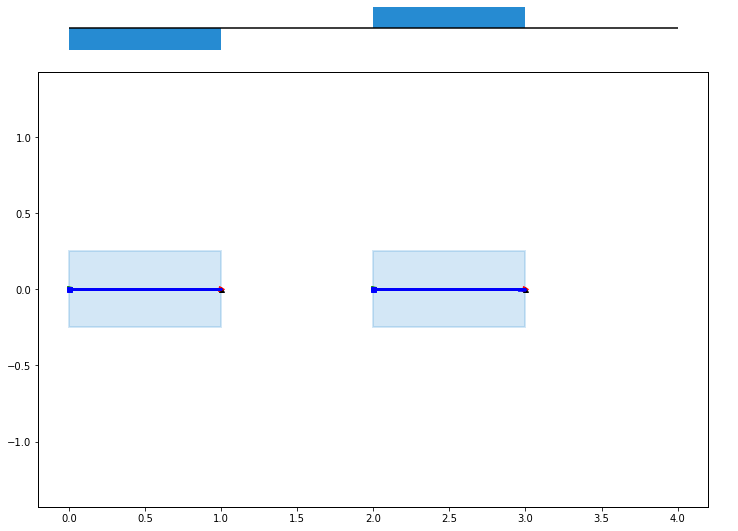

In [39]:
artist = zgoubidoo.vis.ZgoubiMpl()
zgoubidoo.vis.cartouche(line=zi, artist=artist)
zi.plot(ax=artist.ax, tracks=zr.tracks)

Let's modify the input to improve the plotting. The following example will:

 - use the `FakeDrift` command to force the continuous visualization of the tracks;
 - illustrate how to add more elements to the input;
 - illustrate how one can misalign elements.

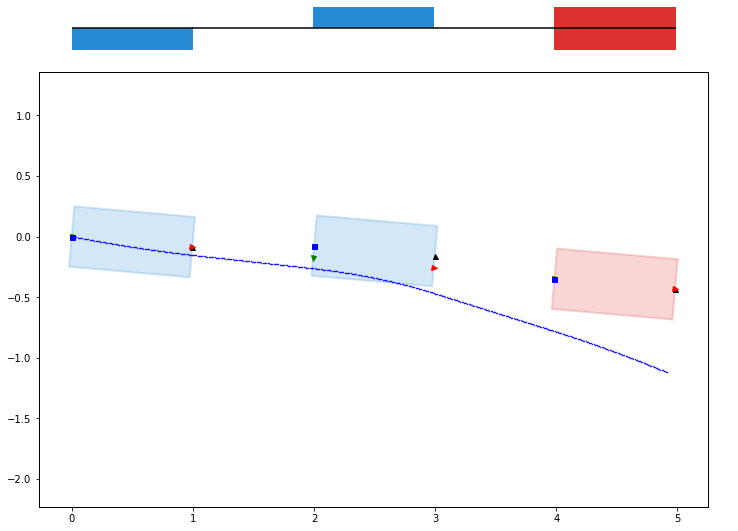

In [61]:
qf = Quadrupole('QF', XL=1*_.m, B0=0.1 * _.tesla, ALE=5*_.degree, KPOS=1)
qd = Quadrupole('QD', XL=1*_.m, B0=-0.05 * _.tesla, YCE=10*_.cm, KPOS=2)

zi = zgoubidoo.Input(name='FODO', line=[
    Objet2('BUNCH', BORO=k.brho),
    Proton(),
    qf,
    FakeDrift(XL=1 * _.m),  # FakeDrift is actually a MULTIPOLE with a very small but non zero B0 field, forcing zgoubi to track
    qd,
    FakeDrift(XL=1 * _.m),  # FakeDrift is actually a MULTIPOLE with a very small but non zero B0 field, forcing zgoubi to track
    Multipole(XL=1 * _.m, B1=5 * _.kilogauss),
])
zi.survey()
zi.XPAS = 0.01 * _.m  # Note that the parameters of all the elements in the input can be set with a single command

z = zgoubidoo.Zgoubi()
zr = z(zi).collect()

artist = zgoubidoo.vis.ZgoubiMpl()
zgoubidoo.vis.cartouche(line=zi, artist=artist)
zi.plot(ax=artist.ax, tracks=zr.tracks)